In [6]:
from scipy import stats
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sns
import pandas as pd
from theano import shared
from sklearn import preprocessing
import model_data as md 
pd.options.mode.chained_assignment = None

import xarray as xr
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.11.2


## Data for standard_basic_run

In [7]:
numsessions = 5


fnames = ['BH09_raw-free_S1-5_corrected.xlsx','CH02_corrected.xlsx','NA01_raw_free-choice_S8-18.xlsx',"CH01_corrected.xlsx"]
#change these to the names of the excel files that you want to run modeling on 


#--------------------------

#load in excel files into one df, resetting the session numbers to start at 1
df = md.load_multiple_data(fnames, reset_sessions = True)


#creates lists of subjects run on each task (classic A, classic B, etc.)

#rename MSNs so that the rats on the outcome task don't have "loss" in the MSN
for i in range(len(df)):
    if df.at[i, 'MSN'] == 'LossrGT_A-losscue_v1':
        df.at[i,'MSN'] = 'outcomeRGT_A'
    if df.at[i, 'MSN'] == 'LossrGT_B-losscue_v1':
        df.at[i,'MSN'] = 'outcomeRGT_B'
        
#rename MSNs so that the rats on the random task don't have "loss" in the MSN
for i in range(len(df)):
    if df.at[i,'MSN'] == 'AnarchyrGT_B-losscue_v6':
        df.at[i,'MSN'] = 'RandomRGT_B'
    if df.at[i,'MSN'] == 'AnarchyrGT_A-losscue_v6':
        df.at[i,'MSN'] = 'RandomRGT_A'
        
        
task_list = df.groupby(['MSN'])['Subject'].unique()

#concatenate together the lists of subjects that run the same task (i.e., puts version A 
#and version B together) - based on unique string for each task name

##change between model runs
subs = np.concatenate((task_list['rGT_A-cue'], task_list['rGT_B-cue']))

#---------------------------------------------


#extract model data from dataframe
model_data = md.get_model_data(df, numsessions, subs)

In [22]:
df.Subject.unique()
data = df[df.Subject.isin(subs)]
# data

In [25]:
import os
os.chdir('nc_files')

In [71]:
standard_basic_fit = az.from_netcdf('standard_basic_fit.nc')
standard_basic_fit

Inference data with groups:
	> posterior
	> sample_stats

In [66]:
sb_df = standard_basic_fit.to_dataframe()
sb_df
sb_columns = sb_df.columns.unique() #'index object'
sb_columns
sb_df.loc[:, lambda df: [('posterior', 'mu_pr[0]', 0), ('posterior', 'mu_pr[1]', 1)]]

,"(posterior, mu_pr[0], 0)","(posterior, mu_pr[1], 1)"
0,-1.918307,-2.071541
1,-1.864454,-2.107177
2,-1.969958,-2.045655
3,-1.977412,-2.019254
4,-2.005118,-2.101969
...,...,...
3995,-1.899849,-2.024769
3996,-1.955664,-2.061708
3997,-1.930561,-2.005179
3998,-1.922988,-2.033469


## Gaussian inferences
plotted a posterior rather than a simple dataset of values, as the data we pass to the model (from get_model_data) is choice data (non-numerical) 

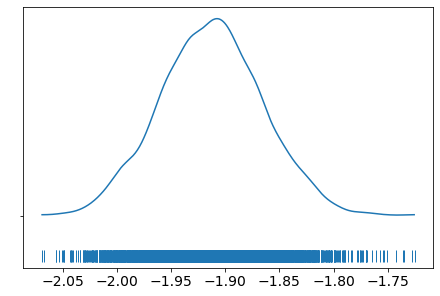

In [67]:
az.plot_kde(sb_df.loc[:, lambda df: [('posterior', 'mu_pr[0]', 0)]].values, rug=True)
plt.yticks([0], alpha=0);

### Model

In [72]:
# post_mu_pr_0 = sb_df.loc[:, lambda df: [('posterior', 'mu_pr[0]', 0)]]
# post_mu_pr_0
# az.plot_trace(post_mu_pr_0)

array([[<AxesSubplot:title={'center':'mu_pr'}>,
        <AxesSubplot:title={'center':'mu_pr'}>]], dtype=object)

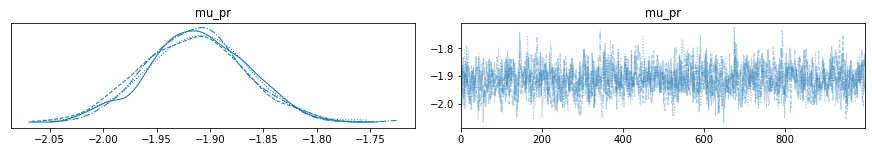

In [73]:
az.plot_trace(standard_basic_fit.posterior.mu_pr, coords = {'mu_pr_dim_0':[0]})

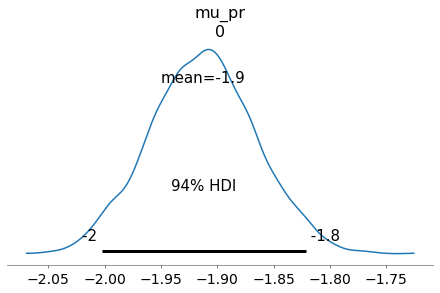

In [74]:
az.plot_posterior(standard_basic_fit.posterior.mu_pr, coords = {'mu_pr_dim_0':[0]});

## ... lots of other stuff

## Group comparison

In [83]:
post_mu_pr_01 = sb_df.loc[:, lambda df: [('posterior', 'mu_pr[0]', 0), ('posterior', 'mu_pr[1]', 1)]]
post_mu_pr_01
# post_mu_pr_01['difference'] = 

,"(posterior, mu_pr[0], 0)","(posterior, mu_pr[1], 1)"
0,-1.918307,-2.071541
1,-1.864454,-2.107177
2,-1.969958,-2.045655
3,-1.977412,-2.019254
4,-2.005118,-2.101969
...,...,...
3995,-1.899849,-2.024769
3996,-1.955664,-2.061708
3997,-1.930561,-2.005179
3998,-1.922988,-2.033469
